In [1]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
xkcd()

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


# PDF/CDF for Prediction and Experiment

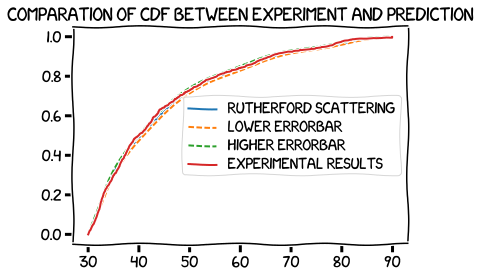

In [2]:
f=lambda x:1/sin(x*pi/180/2)**2
def clpdf(theta):
    '''pdf for coulomb scattering from low to high degree'''
    theta*=pi/180/2
    return cos(theta)/sin(theta)**3/(f(30)-f(90))
def clcdf(theta, low=30, high=90):
    '''relative CDF for coulomb scattering from low to high degree
    params:
    low     low angle
    high    high angle
    '''
    return (f(low)-f(theta))/(f(low)-f(high))
lb=lambda x:x-sqrt(x*(1-x)/1000)
hb=lambda x:x+sqrt(x*(1-x)/1000)
arr=sort(loadtxt("data.dat"))
t=linspace(30,90,100)
cla()
plot(t, clcdf(t), label="Rutherford Scattering")
plot(t, lb(clcdf(t)), '--', label="lower errorbar")
plot(t, hb(clcdf(t)), '--', label="higher errorbar")
plot(arr, arange(1000)/1000, label="Experimental Results")
legend(loc="center right")
title("Comparation of CDF between experiment and prediction")

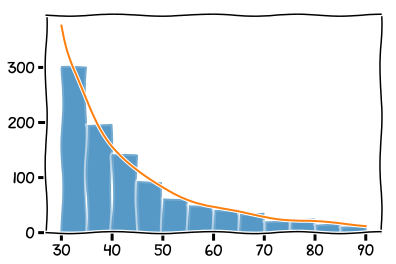

In [3]:
cla()
hist(arr, bins=arange(30, 91, 5), alpha=0.5)
t=linspace(30,90,100)
plot(linspace(30,90,100), clpdf(t)*5000*pi/180, label="Rutherford Scattering")

# Testing the distribution by Pearson's Chi-square test

$$\chi^2=\sum_{i=1}^k\frac{(A_i-E_i)^2}{E_i}$$

In [78]:
histogram(arr, bins=arange(30, 91, 5))

(array([301, 197, 141,  93,  63,  51,  43,  36,  22,  25,  16,  12]),
 array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]))

In [79]:
A, I=_

In [80]:
(clcdf(I[1:])-clcdf(I[:-1]))*1000

array([ 299.28286019,  194.1786786 ,  133.05832334,   95.10348582,
         70.29109798,   53.38501568,   41.46648838,   32.82018965,
         26.39271294,   21.51263729,   17.7381479 ,   14.77036222])

In [81]:
E=_

In [84]:
sum((A-E)**2/E)

3.7853731153227566

$\chi^2$ is very small